In [404]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

#Common Model Algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier;
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


#scorring 
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Echantillonnage 
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [405]:
df=pd.read_csv('predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [407]:
#le Dataset contient 2 targets => il faudrait utiliser une seule taget pour éviter toute fuite de données "data lekeage"
print('les valeurs uniques de la première cible "Target" :\n {}'.format( df.Target.unique()))
print('les valeurs uniques de la deuxième cible "Failure Type " : \n{}'.format( df['Failure Type'].unique()))

les valeurs uniques de la première cible "Target" :
 [0 1]
les valeurs uniques de la deuxième cible "Failure Type " : 
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [408]:
#suppression des variables d'identification 
df=df.drop(["UDI","Product ID"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


# Multi Class Classification  avec la cible "Failure Type "
la Target dans ce cas est une donnée avec plus de deux classes => Multi Class Classification  

In [409]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

## Analyse exploratoire des données

In [410]:
#df1=df.drop("Failure Type",axis=1)
df1=df.drop("Target",axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


In [411]:
#(pd.DataFrame(df1['Failure Type'].value_counts()).T).plot.bar(title='Répartition des classes')


### Exploration des caractéristiques catégorielles

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

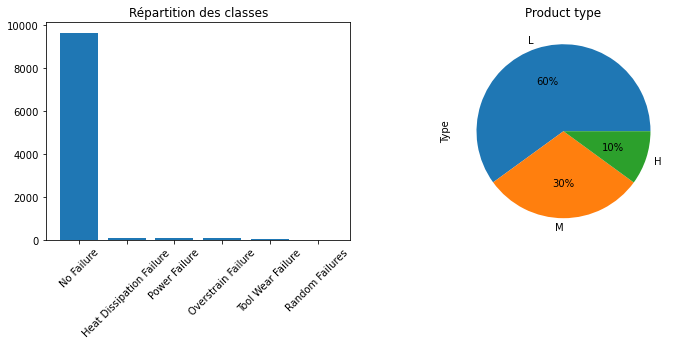

In [412]:
# Target => la target est déséquilibrée => (échantillonage, )
plt.figure(figsize=(12,4))
plt.subplot(121)
#df1['Failure Type'].value_counts().plot.bar(title='Failure Type',autopct='%1.f%%')
plt.bar(df1['Failure Type'].value_counts().index,df1['Failure Type'].value_counts().values, )
plt.xticks(rotation=45)
plt.title('Répartition des classes')
plt.subplot(122)
df1.Type.value_counts().plot.pie(title='Product type',autopct='%.f%%')
df1['Failure Type'].value_counts()

<AxesSubplot:xlabel='Type', ylabel='Failure Type'>

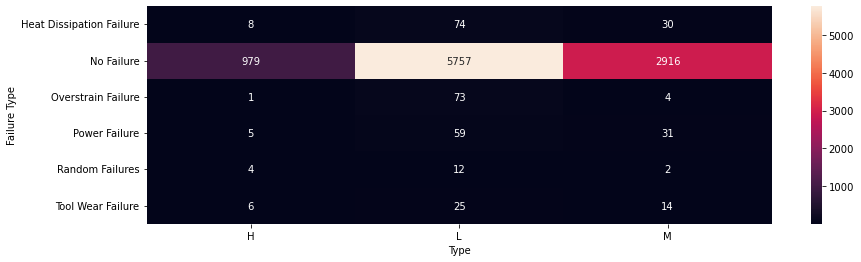

In [413]:
#relation Target Vs product Type
plt.figure(figsize=(14,4))
sns.heatmap(pd.crosstab(df1['Failure Type'],df.Type),annot=True,fmt='d')



### Exploration des caractéristiques numériques

In [414]:
df1.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


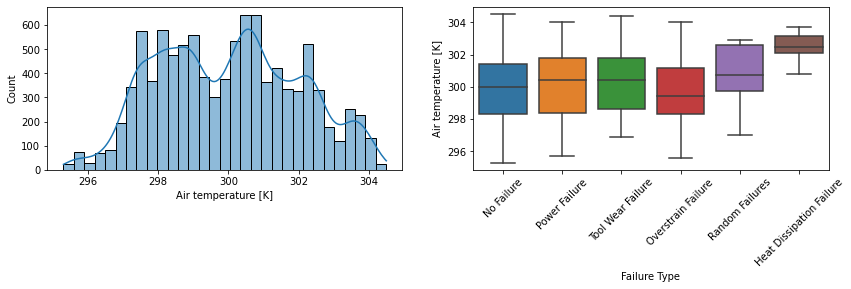

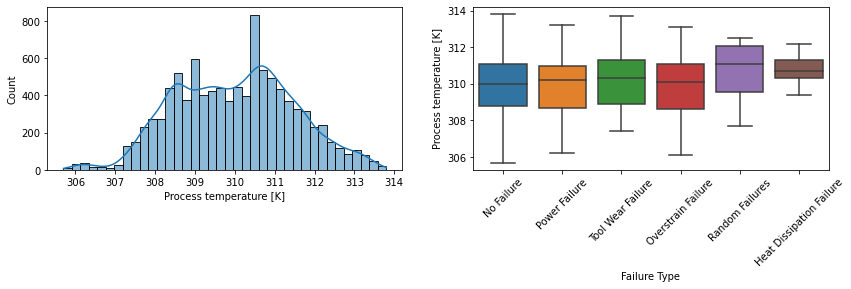

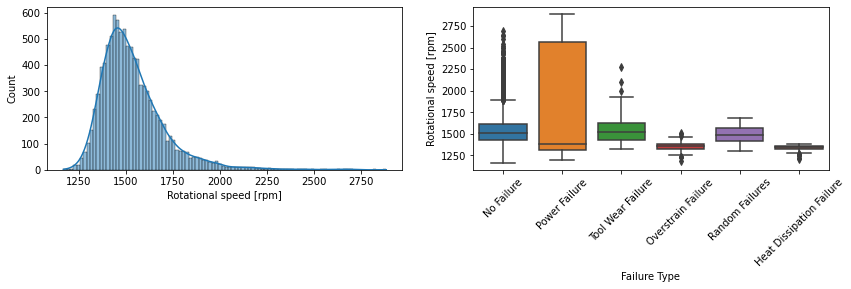

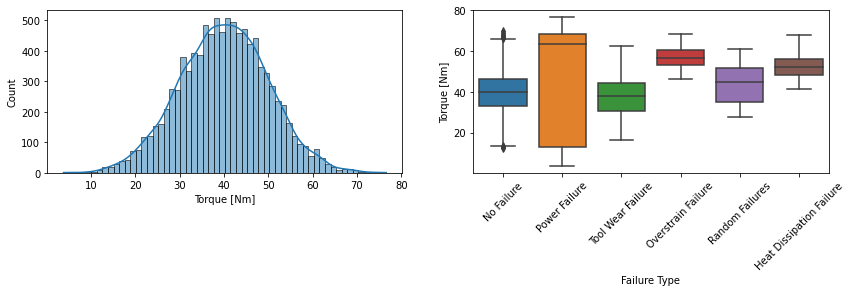

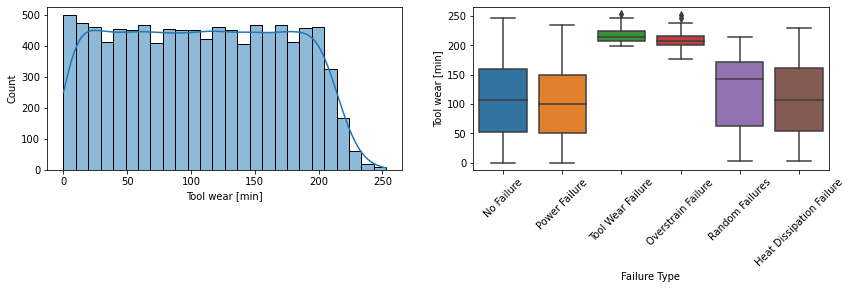

In [415]:
num_col=list(df1.select_dtypes(('float','int')).columns.values)
#num_col.remove('Target')
for col in num_col:
    plt.figure(figsize=(14,3))
    plt.subplot(121)
    sns.histplot(df1,x=col,kde=True)
    plt.subplot(122)
    sns.boxplot(x='Failure Type',y=col,data=df1)
    plt.xticks(rotation=45)


<AxesSubplot:>

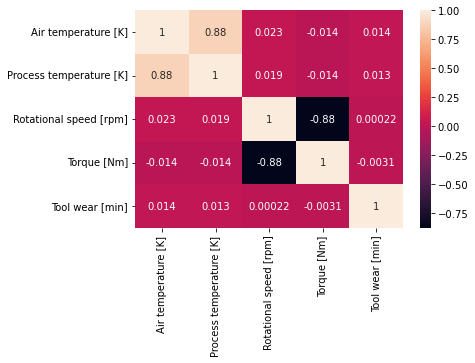

In [416]:
#Corrélation entre les variables
sns.heatmap(df1.corr(),annot=True,)

## Pré-traitement des données (imputation, encodage, scaling..)

#### Encodage descaractéristiques catégorielles


In [417]:
df1.Type.unique()

array(['M', 'L', 'H'], dtype=object)

In [418]:
#LE=LabelEncoder()
#df1['Type']=LE.fit_transform(df1['Type'])
type_dict={'L':0,'M':1, 'H':2}
df1.Type.replace(type_dict,inplace=True)

In [419]:
df1['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [420]:
LE=LabelEncoder()
df1['Failure Type']=LE.fit_transform(df1['Failure Type'])
df1['Failure Type'].value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64

In [421]:
# Renomer les colonnes 
col_nam={'Air temperature [K]':'Air_temperature_K',
'Torque [Nm]':'Torque_Nm',
'Process temperature [K]':'Process_temperature_k',
'Rotational speed [rpm]':'Rotational_speed_rpm', 
'Tool wear [min]':'Tool_wear_min'}
df1.rename(columns=col_nam,inplace=True)
df1

,Type,Air_temperature_K,Process_temperature_k,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Failure Type
0,1,298.1,308.6,1551,42.8,0,1
1,0,298.2,308.7,1408,46.3,3,1
2,0,298.1,308.5,1498,49.4,5,1
3,0,298.2,308.6,1433,39.5,7,1
4,0,298.2,308.7,1408,40.0,9,1
...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,1
9996,2,298.9,308.4,1632,31.8,17,1
9997,1,299.0,308.6,1645,33.4,22,1
9998,2,299.0,308.7,1408,48.5,25,1


#### Normalization
Normalisation après le split des données pour éviter toute fuite de données et pour évaluer le modèle sur des données qui n'a jamais vu (unseen data) 

In [422]:
def split_norm (X,y):
    '''Cette Fonction permet de déviser le dataset en train et Test data et de normaliser le dataset'''
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)
    print('Shape of X_train : ',X_train.shape)
    print('Shape of y_train : ',y_train.shape)
    print('Shape of X_test  : ',X_test.shape)
    print('Shape of y_test  : ',y_test.shape)

    col =X_train.columns
    MMS=MinMaxScaler()
    X_train=MMS.fit_transform(X_train)
    X_test=MMS.transform(X_test)
    X_train=pd.DataFrame(X_train,columns=col)
    X_test=pd.DataFrame(X_test,columns=col)
    return X_train,y_train, X_test,y_test

# Modeling

In [423]:
random_state=0
def training(X_train,y_train,X_test,y_test):
    
  
    RFR=RandomForestClassifier(
        n_jobs=1, random_state=0,
        n_estimators=10, max_features=5, max_depth=7)
    
    GBR=GradientBoostingClassifier(
        random_state=0, 
        n_estimators=10, max_features=5, max_depth=10,
        learning_rate=0.05, subsample=0.5)
    
    XGBC=XGBClassifier(objective='reg:squarederror',eval_metric='mlogloss',random_state=random_state,
        seed=0,
        n_estimators=10, max_depth=7,
        learning_rate=0.01, subsample=0.5 ,colsample_bytree= 0.8)
    
    from sklearn.ensemble import StackingClassifier
    stkclf=StackingClassifier([('RFR',RFR),
                           ('GBR',GBR),
                           ('XGBC',XGBC)])
    classifiers = [
                  stkclf,
                  LogisticRegression(random_state = random_state),
                  LinearDiscriminantAnalysis(),
                  KNeighborsClassifier(),
                  SVC(random_state=random_state),
                  DecisionTreeClassifier(random_state=random_state),
                  RandomForestClassifier(random_state=random_state),
                  AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1),
                  GradientBoostingClassifier(random_state=random_state),
                  MLPClassifier(max_iter=10000,random_state=random_state),
                  SGDClassifier(random_state = random_state),
                  XGBClassifier(eval_metric='mlogloss',random_state = random_state)
                  ]
    
    res_columns=['clf name', 'clf accuracy', 'clf recall','clf precision','clf f1_score']
    df_result = pd.DataFrame(columns = res_columns)
    idx_raws=0
    for cl in tqdm(classifiers):
        monclf=cl.fit(X_train,y_train)
        ypred=monclf.predict(X_test)
        df_result.loc[idx_raws, 'clf name']= cl.__class__.__name__
        df_result.loc[idx_raws,'clf accuracy' ]=accuracy_score(y_test,ypred)
        df_result.loc[idx_raws,'clf recall' ]=recall_score(y_test,ypred,average='macro')
        df_result.loc[idx_raws,'clf precision' ]=precision_score(y_test,ypred,average='macro')
        df_result.loc[idx_raws,'clf f1_score' ]=f1_score(y_test,ypred,average='macro')
        idx_raws=idx_raws+1
    df_result.sort_values(by='clf f1_score',ascending=False,inplace=True)
    return df_result


import itertools
def skplot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Apprentissage des modèles sans traitement du désequilibre des classes

In [424]:
y=df1['Failure Type']
X=df1.drop('Failure Type',axis=1)
X_train,y_train, X_test,y_test= split_norm(X,y)

Shape of X_train :  (8000, 6)
Shape of y_train :  (8000,)
Shape of X_test  :  (2000, 6)
Shape of y_test  :  (2000,)


In [425]:
y_test.value_counts()

1    1927
0      21
2      21
3      18
5      10
4       3
Name: Failure Type, dtype: int64

In [427]:
training(X_train,y_train,X_test,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:17<00:00,  1.48s/it]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
11,XGBClassifier,0.986,0.600804,0.651219,0.620683
8,GradientBoostingClassifier,0.981,0.558486,0.608865,0.582045
0,StackingClassifier,0.983,0.527432,0.603217,0.558405
6,RandomForestClassifier,0.982,0.519409,0.603747,0.547157
5,DecisionTreeClassifier,0.9755,0.541834,0.545276,0.54143
9,MLPClassifier,0.979,0.501867,0.583399,0.536082
7,AdaBoostClassifier,0.9765,0.524985,0.546051,0.533044
3,KNeighborsClassifier,0.967,0.279818,0.433829,0.320668
2,LinearDiscriminantAnalysis,0.9665,0.288991,0.354425,0.307161
4,SVC,0.968,0.251236,0.461388,0.295988


In [393]:
#les classes 
cl=LE.classes_
cl

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

Confusion matrix, without normalization
[[   0   21    0    0    0    0]
 [   0 1927    0    0    0    0]
 [   0   20    1    0    0    0]
 [   0   18    0    0    0    0]
 [   0    3    0    0    0    0]
 [   0   10    0    0    0    0]]

le rapport de classification : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.96      1.00      0.98      1927
           2       1.00      0.05      0.09        21
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        10

    accuracy                           0.96      2000
   macro avg       0.33      0.17      0.18      2000
weighted avg       0.94      0.96      0.95      2000



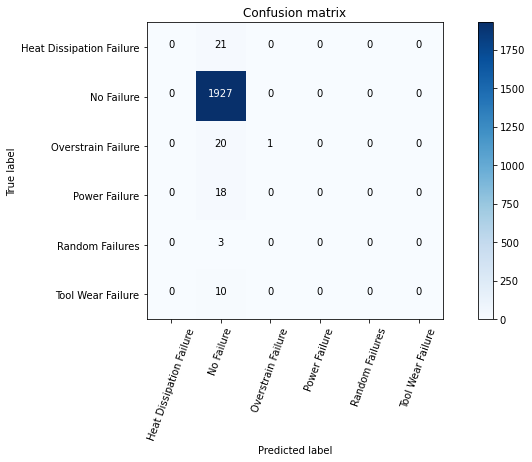

In [394]:
Model= LogisticRegression().fit(X_train,y_train)
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
plt.figure(figsize=(10,6))
skplot_confusion_matrix(cm,classes=cl)
plt.xticks(rotation=70)

print('\nle rapport de classification : \n',(classification_report(y_test,ypred)))

#disp=ConfusionMatrixDisplay(cm)
#disp.plot()


## Apprentissage des modèles avec traitement du désequilibre des classes

### Combinaison de SMOTE et Tomek links 'SMOTETomek'

In [395]:
y=df1['Failure Type']
X=df1.drop('Failure Type',axis=1)

In [396]:
#Echantillonnage en utilisant la Combinaison SMOTETomek
X_over_sample, y_over_sample = SMOTETomek(random_state=0).fit_resample(X,y)
y_over_sample.value_counts()

2    9652
0    9649
3    9645
5    9644
4    9643
1    9625
Name: Failure Type, dtype: int64

In [397]:
X_train,y_train, X_test,y_test= split_norm(X_over_sample, y_over_sample)

Shape of X_train :  (46286, 6)
Shape of y_train :  (46286,)
Shape of X_test  :  (11572, 6)
Shape of y_test  :  (11572,)


In [428]:
training(X_train,y_train,X_test,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:18<00:00,  1.55s/it]


,clf name,clf accuracy,clf recall,clf precision,clf f1_score
11,XGBClassifier,0.986,0.600804,0.651219,0.620683
8,GradientBoostingClassifier,0.981,0.558486,0.608865,0.582045
0,StackingClassifier,0.983,0.527432,0.603217,0.558405
6,RandomForestClassifier,0.982,0.519409,0.603747,0.547157
5,DecisionTreeClassifier,0.9755,0.541834,0.545276,0.54143
9,MLPClassifier,0.979,0.501867,0.583399,0.536082
7,AdaBoostClassifier,0.9765,0.524985,0.546051,0.533044
3,KNeighborsClassifier,0.967,0.279818,0.433829,0.320668
2,LinearDiscriminantAnalysis,0.9665,0.288991,0.354425,0.307161
4,SVC,0.968,0.251236,0.461388,0.295988


Confusion matrix, without normalization
[[1936    1    0    0    0    0]
 [   0 1871    2    4    6   20]
 [   0    0 1915    0    0    0]
 [   0    0    0 1941    0    0]
 [   0    2    0    0 1950    0]
 [   0    0    1    0    0 1923]]

Le rapport de classification : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1937
           1       1.00      0.98      0.99      1903
           2       1.00      1.00      1.00      1915
           3       1.00      1.00      1.00      1941
           4       1.00      1.00      1.00      1952
           5       0.99      1.00      0.99      1924

    accuracy                           1.00     11572
   macro avg       1.00      1.00      1.00     11572
weighted avg       1.00      1.00      1.00     11572



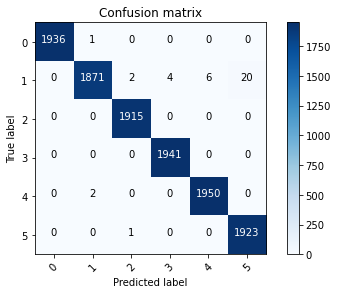

In [401]:
Model= XGBClassifier(eval_metric='mlogloss',random_state = random_state).fit(X_train,y_train)
ypred=Model.predict(X_test)
cm=confusion_matrix(y_test,ypred)
skplot_confusion_matrix(cm,[0,1,2,3,4,5])
print('\nLe rapport de classification : \n',(classification_report(y_test,ypred)))